In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import statements
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
churn_data = data.copy()

In [7]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
churn_data = churn_data.drop('customerID', axis=1)
print(churn_data)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [9]:
# Convert 'total_charges' column to numeric (integer)
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data['TotalCharges'].fillna(0, inplace=True)
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(int)

In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
numeric_columns = churn_data.select_dtypes(include=['number'])
categorical_columns = churn_data.select_dtypes(include=['object'])

In [12]:
print("\nNumeric Columns:")
print(numeric_columns)


Numeric Columns:
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0                 0       1           29.85            29
1                 0      34           56.95          1889
2                 0       2           53.85           108
3                 0      45           42.30          1840
4                 0       2           70.70           151
...             ...     ...             ...           ...
7038              0      24           84.80          1990
7039              0      72          103.20          7362
7040              0      11           29.60           346
7041              1       4           74.40           306
7042              0      66          105.65          6844

[7043 rows x 4 columns]


In [13]:
print("\nCategorical Columns:")
label_encoder = LabelEncoder()
print(label_encoder)



Categorical Columns:
LabelEncoder()


In [14]:
copied_data= data.copy()
for column in categorical_columns:
       copied_data[column] = label_encoder.fit_transform(data[column])

for column in numeric_columns:
       copied_data[column] = label_encoder.fit_transform(data[column])



In [15]:
copied_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


In [16]:
print(copied_data)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1      24   
7039  2234-XADUH       0              0        1           1      72   
7040  4801-JZAZL       0              0        1           1      11   
7041  8361-LTMKD       1              1        1           0       4   
7042  3186-AJIEK       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0          

In [17]:
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [18]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   int64 
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   int64 
 4   Dependents        7043 non-null   int64 
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   int64 
 7   MultipleLines     7043 non-null   int64 
 8   InternetService   7043 non-null   int64 
 9   OnlineSecurity    7043 non-null   int64 
 10  OnlineBackup      7043 non-null   int64 
 11  DeviceProtection  7043 non-null   int64 
 12  TechSupport       7043 non-null   int64 
 13  StreamingTV       7043 non-null   int64 
 14  StreamingMovies   7043 non-null   int64 
 15  Contract          7043 non-null   int64 
 16  PaperlessBilling  7043 non-null   int64 
 17  PaymentMethod 

In [19]:
copied_data= copied_data.drop('customerID',axis=1)

In [20]:
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

In [21]:
copied_data.dtypes

gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

In [22]:
X = copied_data.drop('Churn', axis=1)
y = copied_data['Churn']
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)
copied_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1


           Feature  Importance
17  MonthlyCharges    0.177270
4           tenure    0.173175
18    TotalCharges    0.170093
14        Contract    0.086530
16   PaymentMethod    0.050919


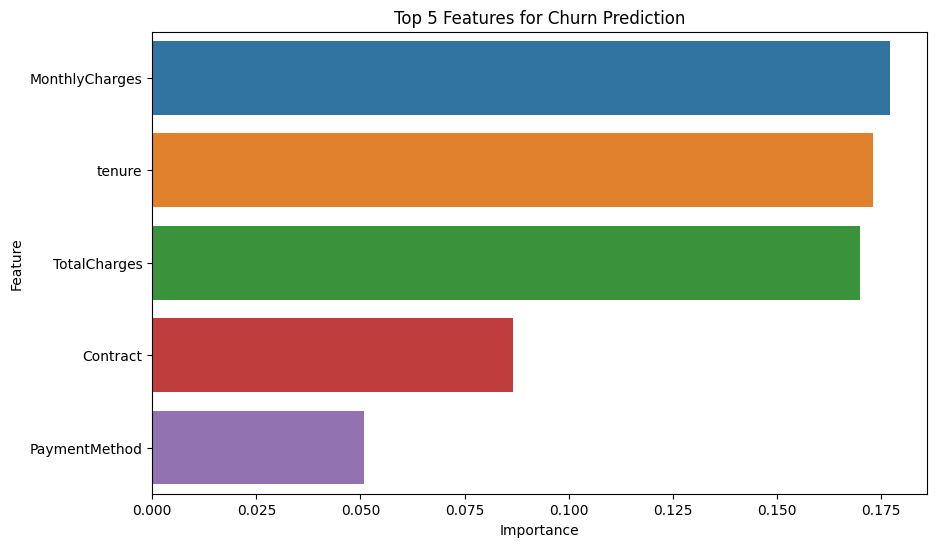

In [23]:
# Instantiate the model
rf_model = RandomForestClassifier()

# Fit the model to your data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Display the top features
print(top_features)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, orient='h')
plt.title('Top 5 Features for Churn Prediction')
plt.show()

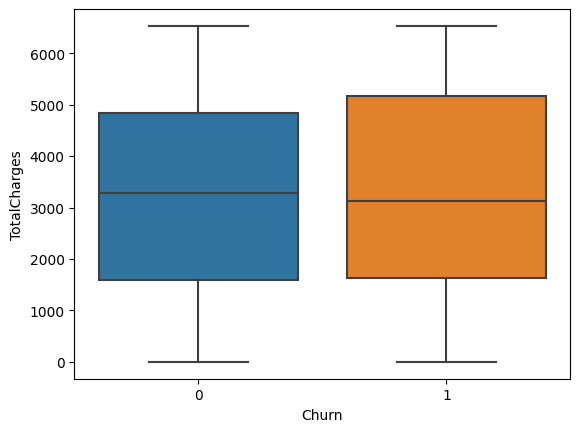

In [24]:
sns.boxplot(x='Churn', y='TotalCharges' , data=copied_data)
plt.show()

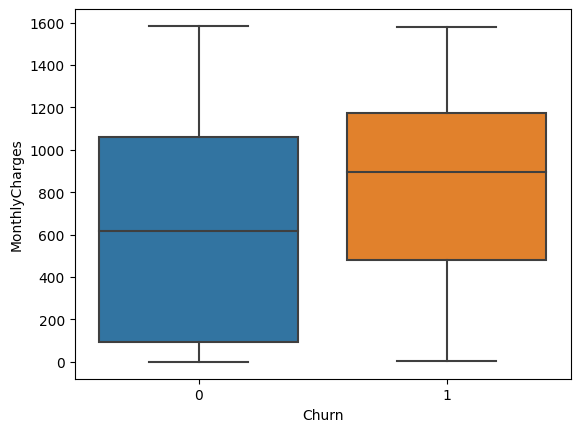

In [25]:


# Example: Visualize the relationship between MonthlyCharges and Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=copied_data)
plt.show()


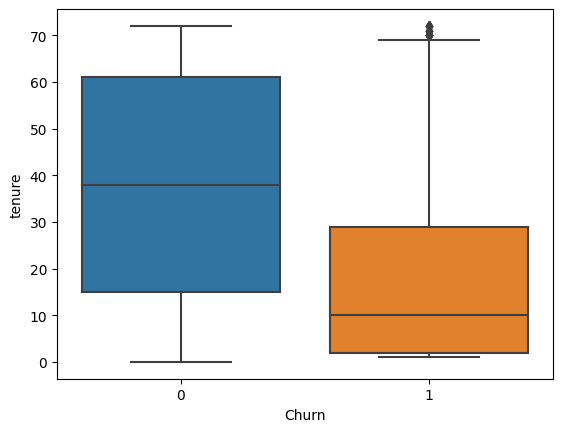

In [26]:
sns.boxplot(x='Churn', y='tenure' , data=copied_data)
plt.show()


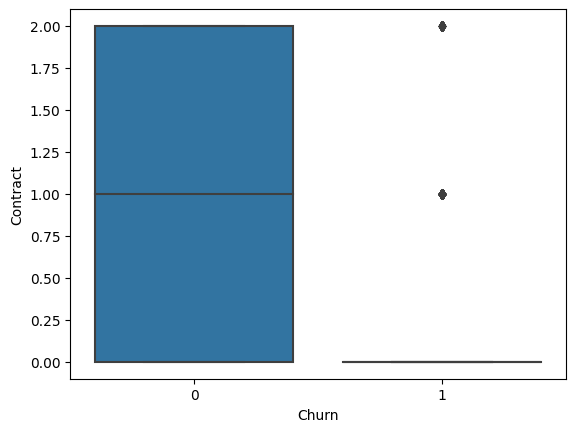

In [27]:
sns.boxplot(x='Churn', y='Contract' , data=copied_data)
plt.show()


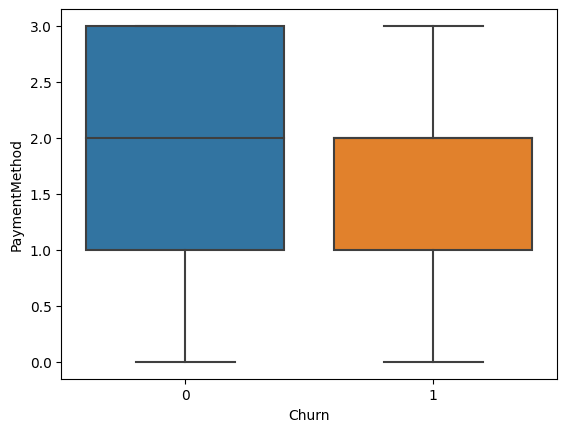

In [28]:
sns.boxplot(x='Churn', y='PaymentMethod' , data=copied_data)
plt.show()


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [31]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
177/177 [==============================] - 2s 6ms/step - loss: 0.6636 - accuracy: 0.6235 - val_loss: 0.6024 - val_accuracy: 0.7516
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5663 - accuracy: 0.7449 - val_loss: 0.5220 - val_accuracy: 0.7452
Epoch 3/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5072 - accuracy: 0.7464 - val_loss: 0.4775 - val_accuracy: 0.7608
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4773 - accuracy: 0.7614 - val_loss: 0.4552 - val_accuracy: 0.7786
Epoch 5/100
177/177 [==============================] - 1s 5ms/step - loss: 0.4620 - accuracy: 0.7749 - val_loss: 0.4425 - val_accuracy: 0.7779
Epoch 6/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4530 - accuracy: 0.7833 - val_loss: 0.4345 - val_accuracy: 0.7857
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4473 - accuracy: 0.7847 - val_loss: 0.4293 - val_accuracy: 0.7935

In [33]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8112
Test Loss: 0.4082
Test Accuracy: 81.1214


In [34]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [35]:
!pip install scikeras

In [36]:
from scikeras.wrappers import KerasClassifier

In [37]:

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import make_scorer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline



In [38]:

# Define the parameter grid for grid search
param_grid = {
    'mlpclassifier__activation': ['relu', 'tanh', 'logistic'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
}

# Use StratifiedKFold for classification tasks
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create MLP model with the best hyperparameters
mlp_model = MLPClassifier(
    activation='relu',
    alpha=0.0001,
    hidden_layer_sizes=(50,),
    random_state=42
)

# Create a pipeline with preprocessing and MLP model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Assuming all features are numeric
    ('mlpclassifier', mlp_model)
])

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=cv, refit='auc', verbose=1)

# Perform grid search
grid_result = grid_search.fit(X, y)

# Display the best parameters and the corresponding AUC-ROC score
print("Best AUC-ROC: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Access the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best AUC-ROC: 0.801504 using {'mlpclassifier__activation': 'logistic', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,)}


In [39]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
best_params


{'mlpclassifier__activation': 'logistic',
 'mlpclassifier__alpha': 0.0001,
 'mlpclassifier__hidden_layer_sizes': (50,)}

In [41]:
print(f'Test Accuracy: {accuracy*100}')
print(f'Best Hyperparameters: {best_params}')

Test Accuracy: 73.66926898509581
Best Hyperparameters: {'mlpclassifier__activation': 'logistic', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (50,)}


In [42]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [43]:
from sklearn.pipeline import make_pipeline

In [44]:
# Assuming X and y are your features and labels
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Preprocessing using StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns.tolist())
    ],
    remainder='passthrough'
)


In [46]:
# Create MLP model with the best hyperparameters
mlp_model = MLPClassifier(
    activation='relu',
    alpha=0.0001,
    hidden_layer_sizes=(32,),
    learning_rate='adaptive',
    solver='adam',
    random_state=42



)

In [47]:
# Create a pipeline with preprocessing and MLP model
pipeline = make_pipeline(preprocessor, mlp_model)

In [48]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'tenure', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(32,),
                               learning_rate='adaptive', random_state=42))])

In [49]:
# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)

In [50]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')

Accuracy: 80.34066713981547


In [51]:
from sklearn.metrics import accuracy_score, roc_auc_score


In [52]:
# Evaluate the model on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [53]:
# Convert probabilities to binary predictions using a threshold
threshold = 0.5
y_pred_binary = (y_pred_proba > threshold).astype(int)

In [54]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy*100}')


Accuracy: 81.61816891412349


In [55]:
# Calculate and print the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score*100}')

AUC Score: 86.20480399971015


In [56]:
!pip install joblib


In [57]:
import joblib

In [58]:
model_filename = 'churning_customer_model.joblib'

In [59]:
joblib.dump(best_model, 'churning_customer_model.joblib')

['churning_customer_model.joblib']

In [60]:
print(f'Model saved to {"churning_customer_model.joblib"}')

Model saved to churning_customer_model.joblib
